In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 📊 The Great Reset: A Simulation of Global Debt Forgiveness vs Austerity

By [Your Name or Aron Bisrat]

---

## ✨ Project Overview

> **What if the world’s richest 1% voluntarily erased all global debt — public and private — to give the other 99% a clean start?**

This notebook is a mix of **speculative fiction and data simulation**. It compares two global futures:

- **Scenario A**: Business as usual → debt continues to rise, inequality worsens.
- **Scenario B**: Global debt reset in 2035 → the world starts fresh.

Inspired by the short story *The Great Reset*, this simulation uses synthetic data for two sample countries — **Greece** and **Zimbabwe** — and models how a reset could impact debt, GDP, inequality, and health spending.

---

## 📘 Short Story: *The Great Reset*

### **Chapter 1: Zero Hour**

It was July 1st, 2035 — the day the world held its breath.

From Nairobi to New York, Dhaka to Damascus, every screen blinked with the same message:

> “We, the undersigned 1% — representing $217 trillion in global wealth — hereby forgive all sovereign, corporate, and personal debt. Effective immediately. No interest, no conditions. The world begins again.”

In the slums of Lagos, Fatima cried as her loans vanished. In Berlin, governments unlocked funds for schools and hospitals. In Washington, markets paused — not in panic, but awe.

A forgotten billionaire whispered from his vineyard,  
> “Now let’s see what humanity can do… without chains.”

---

### **Chapter 2: The Quiet Billionaire**

His name was Émile Laurent. A ghost in the halls of wealth.

He made his fortune in high-frequency trading and war-zone reconstruction. By 2030, he was worth $194 billion. But one night, in a Swiss fortress with the 12 most powerful billionaires alive, he stood and said:

> “Let’s erase it all. One world. One slate. One shot.”

Some laughed. Some left. But others stayed:
- A Saudi technocrat tired of oil wars.
- A Chinese biotech tycoon mourning his son.
- A Latin American crypto king burned by corruption.
- A Silicon Valley matriarch, who whispered:  
> “If not us… who?”

---

## 📊 Simulation Setup

Now, let’s simulate what happens if all debt is forgiven in 2035.

We compare:
- Rising debt trajectory (**Baseline**)
- Zero debt from 2035 (**Reset**)



In [2]:
# 📚 Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 📅 Create sample timeline
years = list(range(2000, 2041))
greece_debt = [100 + i * 5 for i in range(len(years))]
zimbabwe_debt = [40 + i * 3 for i in range(len(years))]
greece_gdp = [250 + i * 2 for i in range(len(years))]
zimbabwe_gdp = [30 + i * 1.5 for i in range(len(years))]

df = pd.DataFrame({
    "Year": years * 2,
    "Country": ["Greece"] * len(years) + ["Zimbabwe"] * len(years),
    "Debt": greece_debt + zimbabwe_debt,
    "GDP": greece_gdp + zimbabwe_gdp
})

df["Debt_GDP"] = df["Debt"] / df["GDP"]
df["Scenario"] = df["Year"].apply(lambda y: "Reset" if y >= 2035 else "Baseline")
df["Debt_Reset"] = df.apply(lambda row: 0 if row["Year"] >= 2035 else row["Debt"], axis=1)
df["Debt_GDP_Reset"] = df["Debt_Reset"] / df["GDP"]




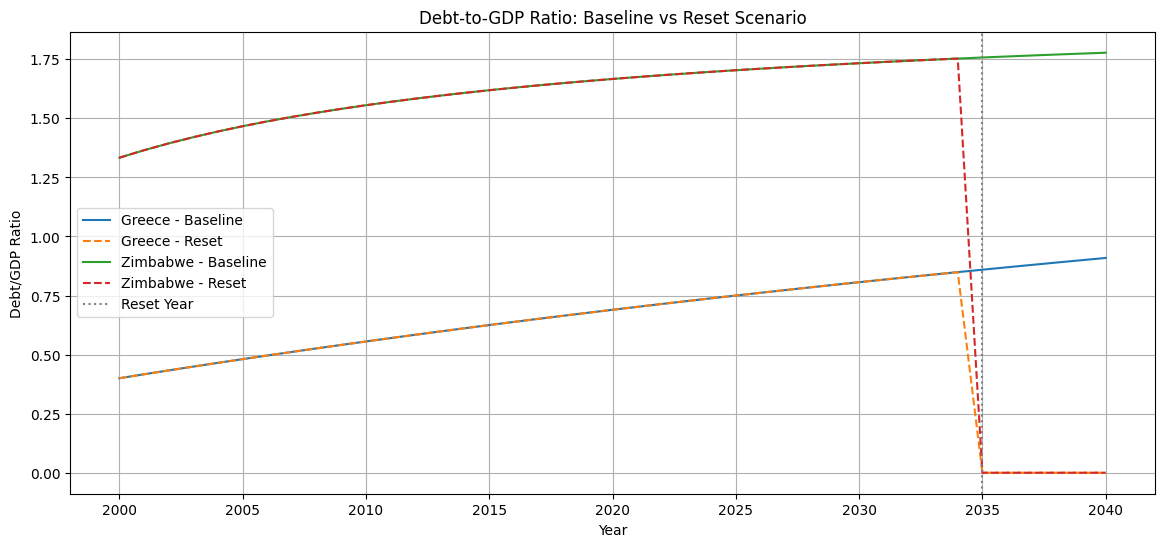

In [3]:
# 📉 Plot Debt-to-GDP Ratio (Actual vs Reset)
plt.figure(figsize=(14, 6))
for country in df["Country"].unique():
    subset = df[df["Country"] == country]
    plt.plot(subset["Year"], subset["Debt_GDP"], label=f"{country} - Baseline")
    plt.plot(subset["Year"], subset["Debt_GDP_Reset"], linestyle="--", label=f"{country} - Reset")

plt.axvline(x=2035, color="gray", linestyle=":", label="Reset Year")
plt.title("Debt-to-GDP Ratio: Baseline vs Reset Scenario")
plt.xlabel("Year")
plt.ylabel("Debt/GDP Ratio")
plt.legend()
plt.grid(True)
plt.show()


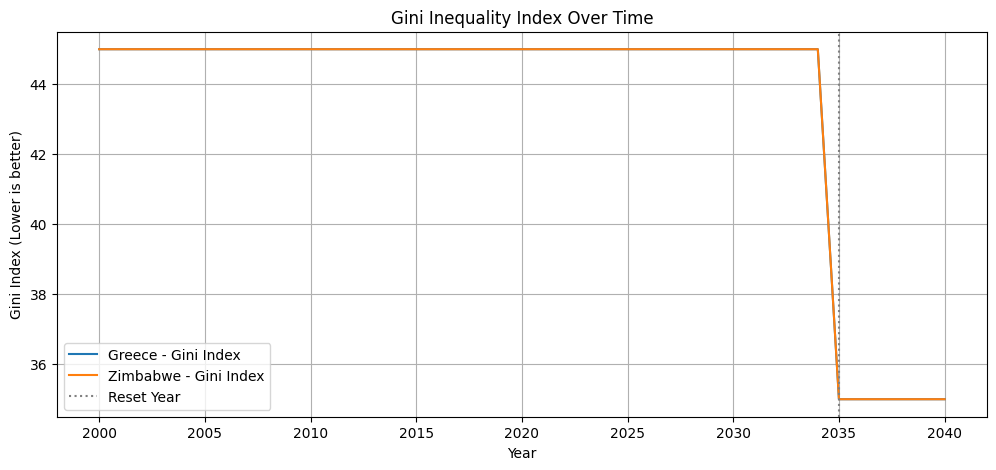

In [4]:
# 🧠 Simulate Other Metrics (Optional Additions)
df["Health_Spending_%GDP"] = df["Year"].apply(lambda y: 5 if y < 2035 else 8)
df["Gini_Index"] = df["Year"].apply(lambda y: 45 if y < 2035 else 35)

# 📊 Plot Gini Index
plt.figure(figsize=(12, 5))
for country in df["Country"].unique():
    subset = df[df["Country"] == country]
    plt.plot(subset["Year"], subset["Gini_Index"], label=f"{country} - Gini Index")

plt.axvline(x=2035, color="gray", linestyle=":", label="Reset Year")
plt.title("Gini Inequality Index Over Time")
plt.xlabel("Year")
plt.ylabel("Gini Index (Lower is better)")
plt.legend()
plt.grid(True)
plt.show()


## 📎 Suggested Tags (When Publishing)

- `economics`  
- `inequality`  
- `debt`  
- `simulation`  
- `data-storytelling`


**Chapter 3: The Pushback**

Not everyone celebrated the Reset.

In London, markets reopened with jittery traders staring at empty debt ledgers. Bonds were now worthless. Hedge funds collapsed overnight. Retirement accounts in the wealthiest nations flickered with red. The old system had been deleted — and with it, the invisible control lines of power.

At the IMF headquarters, silence gave way to shouting. “This is chaos!” roared a senior advisor. “How do we price risk now? Who decides creditworthiness?”

But Émile Laurent had anticipated this. A second message was released globally:

> “Your money is safe. Your ownership remains. But the shackles of debt — the interest, the penalties, the endless servitude — are over. We invite you to help build a new framework: transparent, cooperative, regenerative.”

In the Global South, the Reset was seen not as chaos, but liberation.

Greece launched a national infrastructure renaissance. Zimbabwe introduced free public education and a solar-powered health system. Haiti opened its first space technology incubator, backed by African and Latin American engineers.

Yet in secret corners, a darker coalition formed.

From abandoned banking boardrooms to exiled political elites, the **Old Order** plotted to restore what was lost — not for humanity’s good, but for power’s return.

They called themselves: **“The Architects.”**

And they believed the Reset was not salvation — but war.


## ✅ Conclusion

This simulation explores a radical "what-if": the global 1% voluntarily forgiving all public and private debt. The model shows how such a reset could reduce debt burden, improve inequality, and free nations to invest in health and growth.

Next steps:
- Add real-world IMF/World Bank data
- Extend simulation to more countries
- Include policy frameworks for post-reset sustainability


## 💡 Get Involved!
This is a collaborative data storytelling project imagining a bold economic shift.  
If you're interested in simulation, social justice, or economic theory — fork this notebook and add your take!  
Let's build a data-driven narrative together.

👇 Drop your thoughts, models, or visualizations in the comments or as a fork!
